Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load data

In [10]:
raw_data_dir = Path('../data/raw/processed')

In [12]:
Training_df = pd.read_csv(raw_data_dir/'deduplicated-training-with-medical-specialty.csv')
Testing_df = pd.read_csv(raw_data_dir/'testing-with-medical-specialty.csv')
Training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,medical_specialty,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection


In [13]:
Testing_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,medical_specialty,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infectious,Fungal Infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergic Immunological,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,Gastrointestinal,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hepatobiliary,Chronic Cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Allergic Immunological,Drug Reaction


In [14]:
Training_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         304 non-null    int64 
 1    skin_rash                       304 non-null    int64 
 2    nodal_skin_eruptions            304 non-null    int64 
 3    continuous_sneezing             304 non-null    int64 
 4    shivering                       304 non-null    int64 
 5    chills                          304 non-null    int64 
 6    joint_pain                      304 non-null    int64 
 7    stomach_pain                    304 non-null    int64 
 8    acidity                         304 non-null    int64 
 9    ulcers_on_tongue                304 non-null    int64 
 10   muscle_wasting                  304 non-null    int64 
 11   vomiting                        304 non-null    int64 
 12   burning_micturition             30

In [15]:
Training_df.dtypes.value_counts()

int64     132
object      2
Name: count, dtype: int64

Check if there are any other NaN values in the dataset

In [18]:
# Training_df.isna().sum().tolist()

In [19]:
# Testing_df.isna().sum().tolist()

In [20]:
Training_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.134868,0.138158,0.013158,0.039474,0.013158,0.174342,0.151316,0.036184,0.049342,0.019737,...,0.013158,0.013158,0.013158,0.019737,0.019737,0.019737,0.019737,0.016447,0.016447,0.016447
std,0.342146,0.345635,0.114139,0.195040,0.114139,0.380029,0.358947,0.187056,0.216938,0.139324,...,0.114139,0.114139,0.114139,0.139324,0.139324,0.139324,0.139324,0.127398,0.127398,0.127398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
for col in Training_df:
    print(f"{col} has {Training_df[col].unique()}\n")

itching has [1 0]

skin_rash has [1 0]

nodal_skin_eruptions has [1 0]

continuous_sneezing has [0 1]

shivering has [0 1]

chills has [0 1]

joint_pain has [0 1]

stomach_pain has [0 1]

acidity has [0 1]

ulcers_on_tongue has [0 1]

muscle_wasting has [0 1]

vomiting has [0 1]

burning_micturition has [0 1]

spotting_ urination has [0 1]

fatigue has [0 1]

weight_gain has [0 1]

anxiety has [0 1]

cold_hands_and_feets has [0 1]

mood_swings has [0 1]

weight_loss has [0 1]

restlessness has [0 1]

lethargy has [0 1]

patches_in_throat has [0 1]

irregular_sugar_level has [0 1]

cough has [0 1]

high_fever has [0 1]

sunken_eyes has [0 1]

breathlessness has [0 1]

sweating has [0 1]

dehydration has [0 1]

indigestion has [0 1]

headache has [0 1]

yellowish_skin has [0 1]

dark_urine has [0 1]

nausea has [0 1]

loss_of_appetite has [0 1]

pain_behind_the_eyes has [0 1]

back_pain has [0 1]

constipation has [0 1]

abdominal_pain has [0 1]

diarrhoea has [0 1]

mild_fever has [0 1]

In [25]:
print(Training_df['fluid_overload'].unique())
print(Testing_df['fluid_overload'].unique())

[0]
[0]


If you want to drop fluid_overload column, use this code

In [26]:
# Training_df.drop(['fluid_overload'], axis=1, inplace=True)
# Testing_df.drop(['fluid_overload'], axis=1, inplace=True)

In [28]:
Training_df.columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [29]:
Training_df['prognosis'].nunique() # There are 41 diseases in our label column

41

C:\Users\Hossein-Bg\AppData\Local\Temp\ipykernel_17788\243103264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prognosis', data=Training_df, order=Training_df['prognosis'].value_counts().index, palette="viridis")
C:\Users\Hossein-Bg\AppData\Local\Temp\ipykernel_17788\243103264.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prognosis', data=Testing_df, order=Testing_df['prognosis'].value_counts().index, palette="viridis")


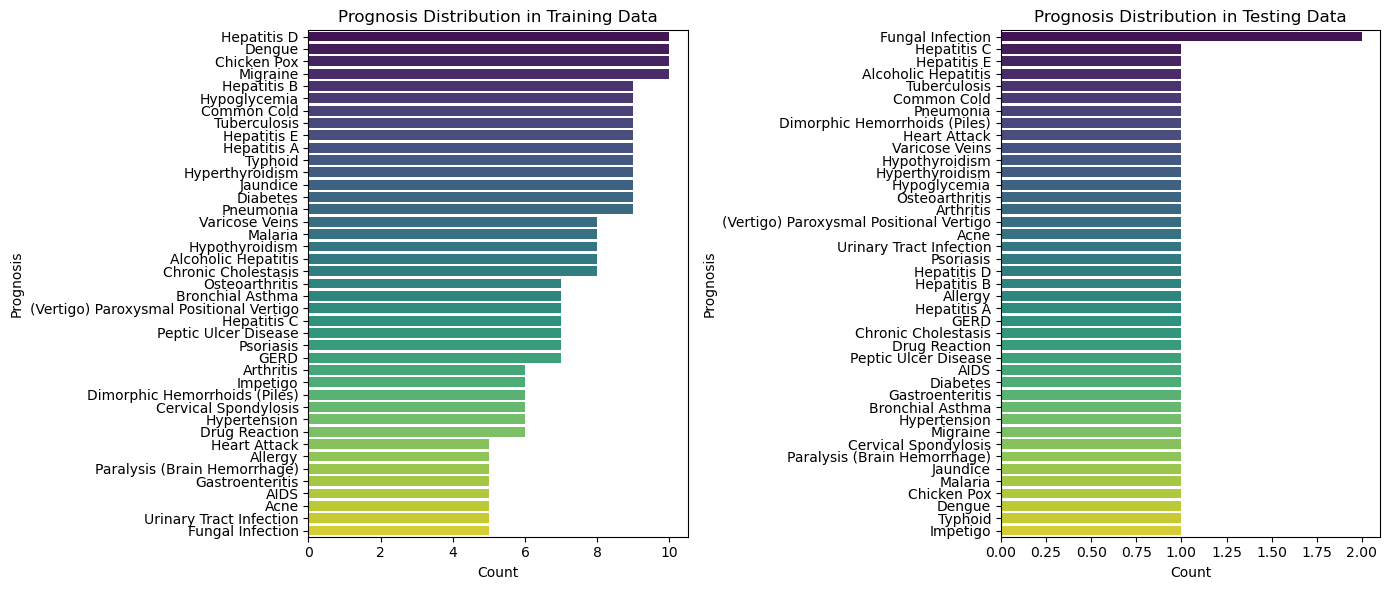

In [32]:
# Visualize the distribution of prognoses in the training and testing datasets
plt.figure(figsize=(14, 6))

# Plot for Training data
plt.subplot(1, 2, 1)
sns.countplot(y='prognosis', data=Training_df, order=Training_df['prognosis'].value_counts().index, palette="viridis")
plt.title("Prognosis Distribution in Training Data")
plt.xlabel("Count")
plt.ylabel("Prognosis")

# Plot for Testing data
plt.subplot(1, 2, 2)
sns.countplot(y='prognosis', data=Testing_df, order=Testing_df['prognosis'].value_counts().index, palette="viridis")
plt.title("Prognosis Distribution in Testing Data")
plt.xlabel("Count")
plt.ylabel("Prognosis")

plt.tight_layout()
plt.show()


This plot allows us to identify the most common symptoms

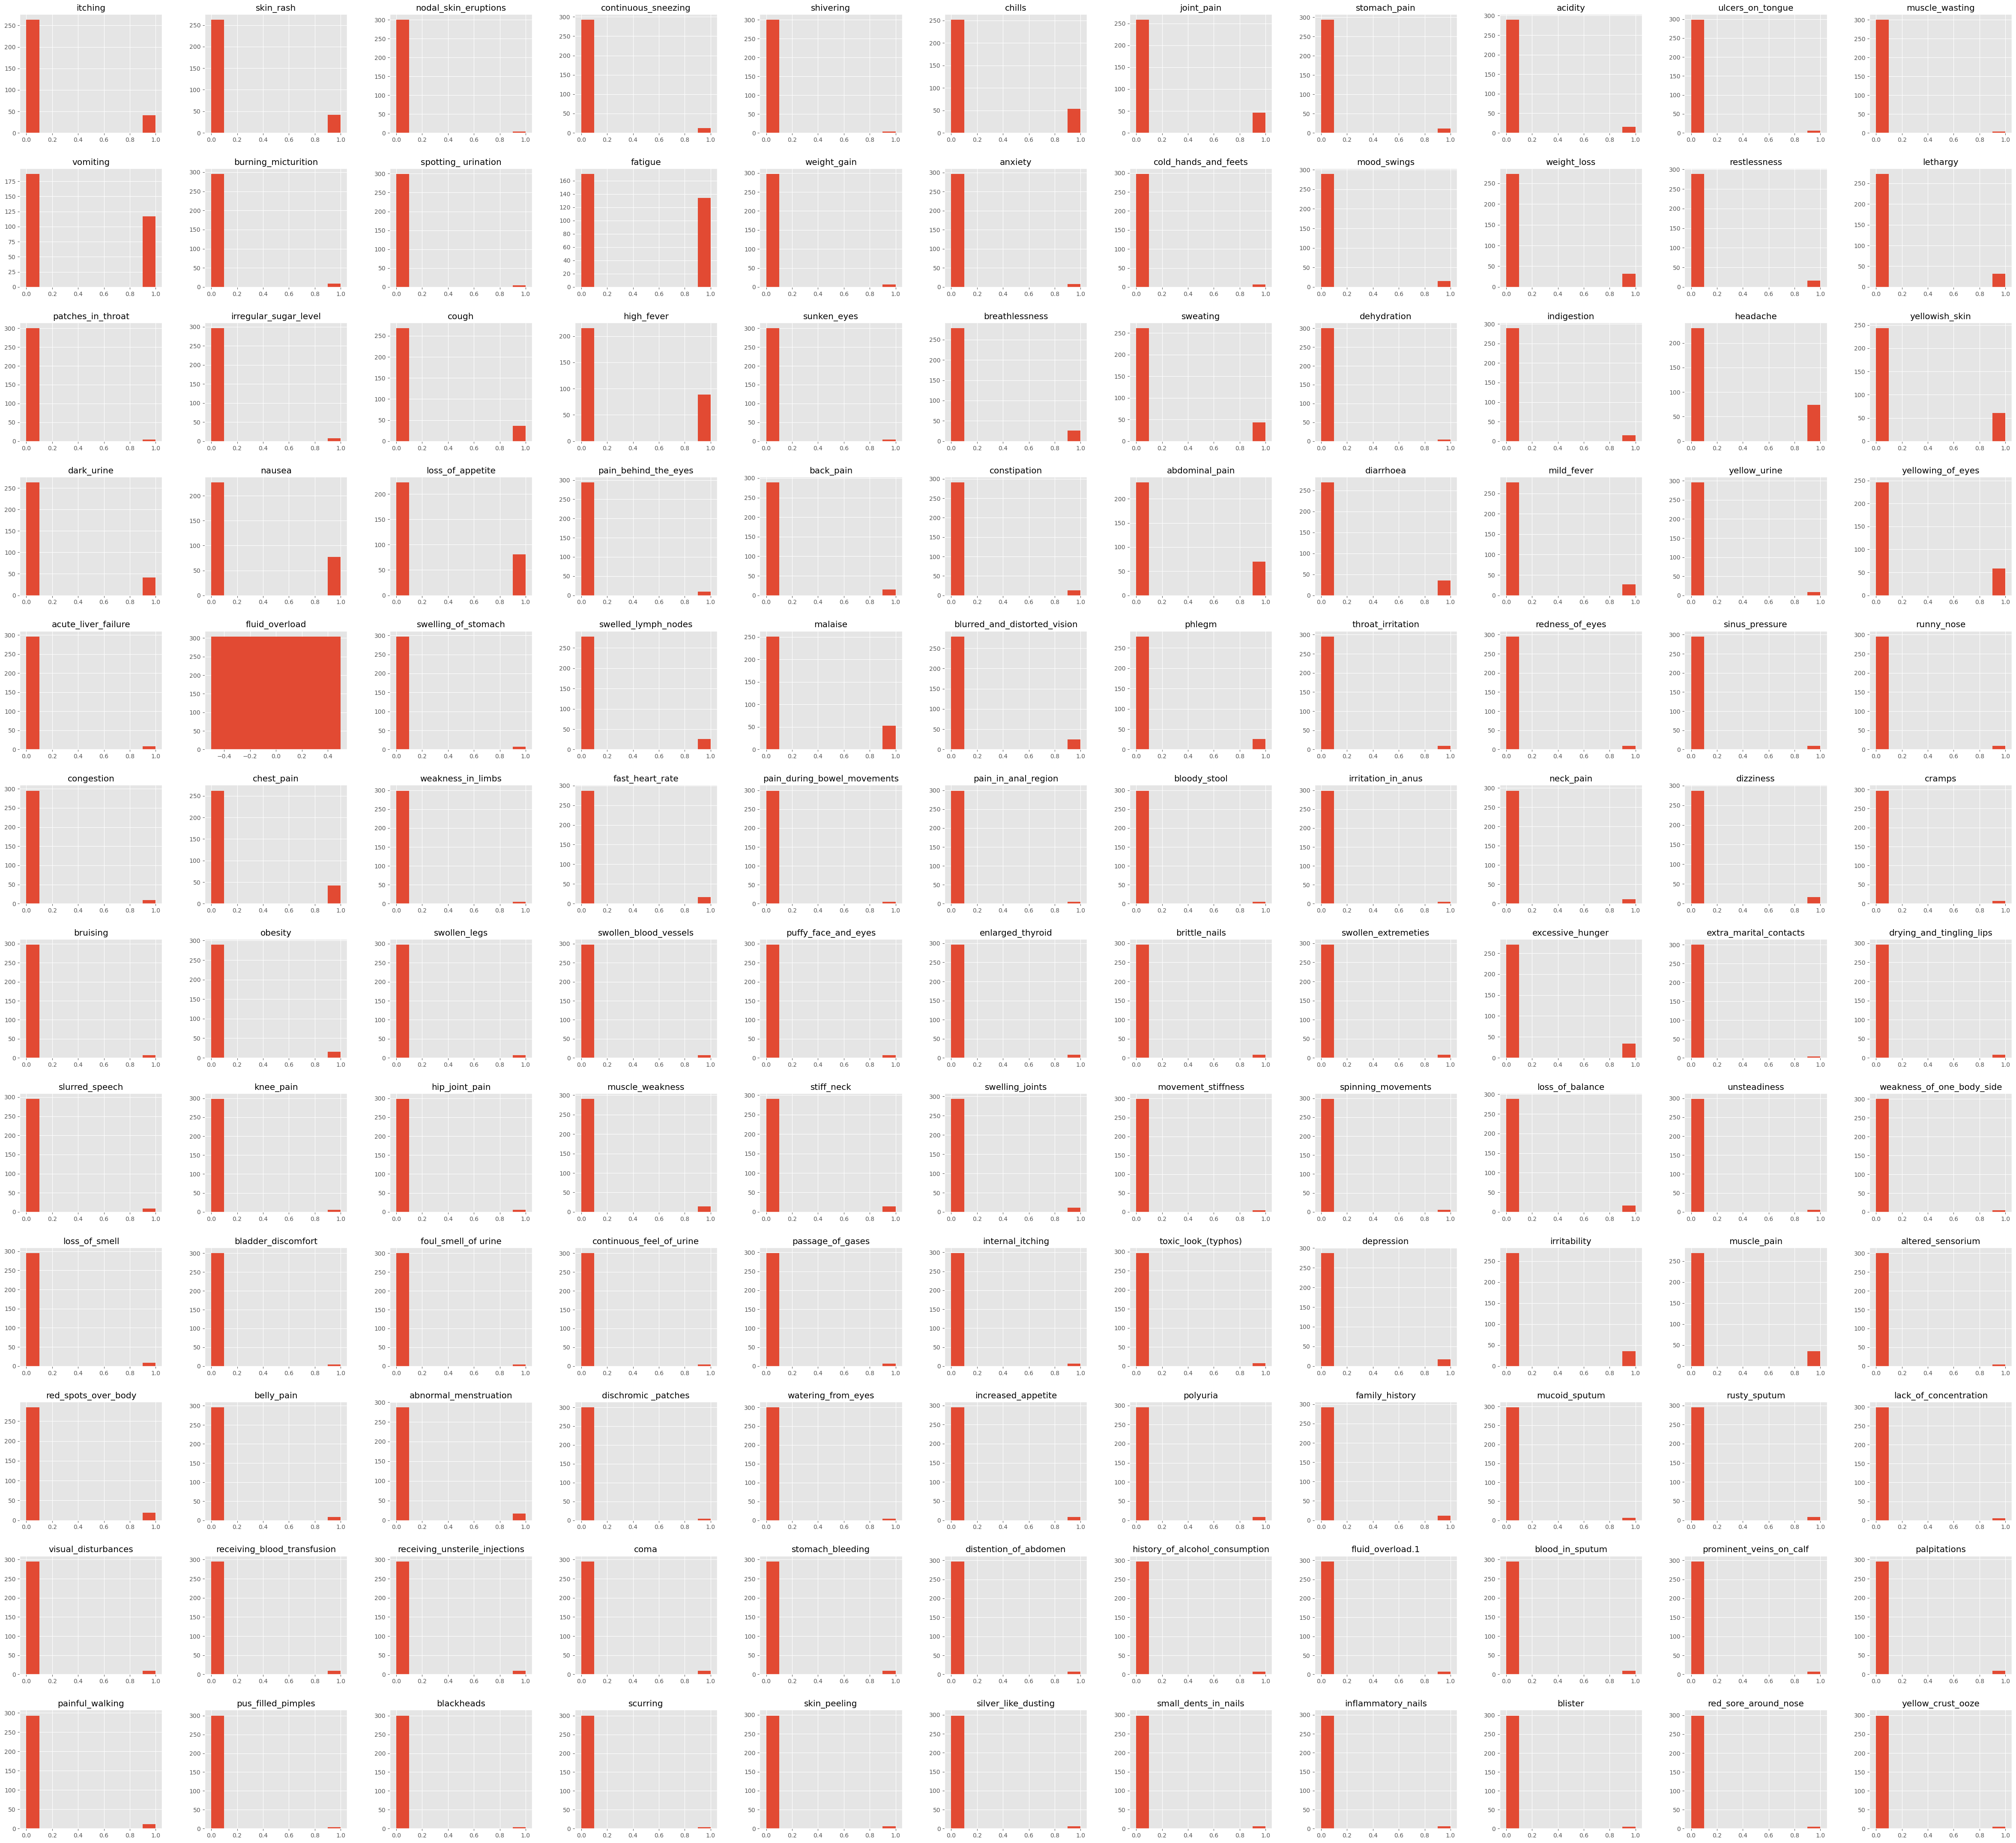

In [33]:
plt.style.use("ggplot")
Training_df.hist(figsize =(60,55),bins='auto')
plt.show()

In [38]:
print(f'Columns of Training_df:\n\n{Training_df.columns}')
print('---------------------------------------')
print(f'Columns of Testing_df:\n\n{Testing_df.columns}')

Columns of Training_df:

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'medical_specialty',
       'prognosis'],
      dtype='object', length=134)
---------------------------------------
Columns of Testing_df:

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'medical_specialty',
       'prognosis'],
      dtype='object', length=134)


Separate features (X) and target (y)

In [40]:
X_train = Training_df.drop(columns=['prognosis', 'medical_specialty'])
y_train = Training_df['medical_specialty']

X_test = Testing_df.drop(columns=['prognosis', 'medical_specialty'])
y_test = Testing_df['medical_specialty']

In [42]:
X_train.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pipeline

In [ ]:
# Define the ModelPipeline class
class ModelPipeline:
    def __init__(self, model_type='logistic_regression'):
        """
        Initialize the pipeline with the chosen model type.
        param model_type: 'logistic_regression' or 'random_forest'
        """
        self.model_type = model_type
        self.label_encoder = LabelEncoder()

        # Select the prediction model with default parameters
        if self.model_type == 'logistic_regression':
            self.model = LogisticRegression(max_iter=1000, C=0.1)  # Stronger regularization
        elif self.model_type == 'random_forest':
            self.model = RandomForestClassifier(
                n_estimators=50, max_depth=10, max_features='sqrt', random_state=42
            )  # Reduced complexity
        else:
            raise ValueError("Invalid model type. Choose 'logistic_regression' or 'random_forest'.")

        # Create the pipeline with feature selection
        self.pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(score_func=f_classif, k=20)),  # Select top 20 features
            ('classifier', self.model)
        ])

    def fit(self, X_train, y_train):
        """
        Fit the pipeline to the training data.
        param X_train: Features for training
        param y_train: Target labels for training
        """
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        self.pipeline.fit(X_train, y_train_encoded)

    def predict(self, X_test):
        """
        Predict using the pipeline.
        param X_test: Features for testing
        return: Predicted labels (decoded)
        """
        y_pred_encoded = self.pipeline.predict(X_test)
        return self.label_encoder.inverse_transform(y_pred_encoded)

    def score(self, X_test, y_test):
        """
        Score the pipeline using test data.
        param X_test: Features for testing
        param y_test: Target labels for testing
        return: Accuracy score
        """
        y_test_encoded = self.label_encoder.transform(y_test)
        return self.pipeline.score(X_test, y_test_encoded)


# Initialize and evaluate the Logistic Regression pipeline
pipeline_lr = ModelPipeline(model_type='logistic_regression')
pipeline_lr.fit(X_train, y_train)
lr_accuracy = pipeline_lr.score(X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)

# Initialize and evaluate the Random Forest pipeline
pipeline_rf = ModelPipeline(model_type='random_forest')
pipeline_rf.fit(X_train, y_train)
rf_accuracy = pipeline_rf.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Logistic Regression Accuracy: 0.7380952380952381
Random Forest Accuracy: 0.7380952380952381


To see the transformed features (X_train) after the pipeline, you can use this code

In [49]:
# Fit the pipeline
pipeline_lr.fit(X_train, y_train)

# Extract the transformed data step by step
# Step 1: After the imputer
X_imputed = pipeline_lr.pipeline.named_steps['imputer'].transform(X_train)

# Step 2: After scaling
X_scaled = pipeline_lr.pipeline.named_steps['scaler'].transform(X_imputed)

# Step 3: After feature selection
X_selected = pipeline_lr.pipeline.named_steps['feature_selection'].transform(X_scaled)

# Print shapes to understand the transformations
print("Original X_train shape:", X_train.shape)
print("After imputation:", X_imputed.shape)
print("After scaling:", X_scaled.shape)
print("After feature selection:", X_selected.shape)

# If you want to inspect the final transformed data:
print("Final transformed X_train after the pipeline:")
print(X_selected)

Original X_train shape: (304, 132)
After imputation: (304, 132)
After scaling: (304, 132)
After feature selection: (304, 20)
Final transformed X_train after the pipeline:
[[-0.45951646 -0.17466675 -0.64339217 ... -0.14189513 -0.14189513
  -0.14189513]
 [-0.45951646 -0.17466675 -0.64339217 ... -0.14189513 -0.14189513
  -0.14189513]
 [-0.45951646 -0.17466675 -0.64339217 ... -0.14189513 -0.14189513
  -0.14189513]
 ...
 [-0.45951646 -0.17466675  1.55426199 ... -0.14189513 -0.14189513
  -0.14189513]
 [-0.45951646 -0.17466675  1.55426199 ... -0.14189513 -0.14189513
  -0.14189513]
 [-0.45951646 -0.17466675  1.55426199 ... -0.14189513 -0.14189513
  -0.14189513]]


c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
